In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup as BS
import matplotlib.pyplot as plt
import time

In [2]:
opt = Options()

In [3]:
opt.add_argument('headless') #設定無頭模式
opt.add_argument('--start-maximized') #視窗最大化
opt.add_argument('user-agent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.157 Safari/537.36"')
#設定 User-agent
#未設定無頭模式的話，就會開啟一個流覽器視窗，較耗資源

In [4]:
url = 'https://www.google.com/search?safe=strict&ei=yO_fXOjDJ8qX8QXS05ngCg&q=%E8%87%BA%E5%8C%97%E9%9D%92%E5%B9%B4%E8%81%B7%E6%B6%AF%E7%99%BC%E5%B1%95%E4%B8%AD%E5%BF%83&oq=%E8%87%BA%E5%8C%97%E9%9D%92%E5%B9%B4%E8%81%B7%E6%B6%AF%E7%99%BC%E5%B1%95%E4%B8%AD%E5%BF%83&gs_l=psy-ab.3..0l4j0i30l2.7306.7306..8200...0.0..0.93.93.1......0....2j1..gws-wiz.-qOBBxnwSUE'
driver = webdriver.Chrome('chromedriver.exe', options=opt) 
#開啟流覽器，因為設定了無頭，所以不會直的開一個流覽器

In [5]:
driver.get(url) #訪問網頁

In [6]:
driver.save_screenshot('current.png') #拍下流覽器目前所在位置

True

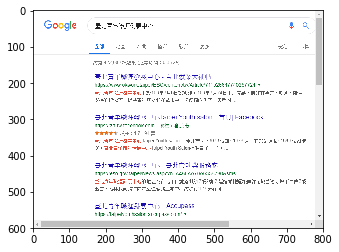

In [7]:
a = plt.imread('current.png')
plt.imshow(a)

In [8]:
driver.find_element_by_class_name('qB0t4').click() #找到 qB0t4 這個 class 並點擊他

In [9]:
driver.save_screenshot('current.png')

True

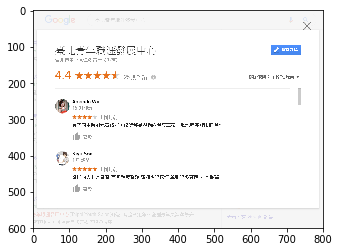

In [10]:
a = plt.imread('current.png')
plt.imshow(a) #點擊完後目前頁面所在的位子

In [11]:
load_ele = driver.find_element(By.XPATH, '//*[@id="gsr"]/g-lightbox/div[2]/div[3]/div/div/div/div[2]/div[2]')
#定義等會要查找的物件

In [12]:
old_count_element = driver.find_elements_by_css_selector('div.WMbnJf.gws-localreviews__google-review')
print ('目前載入評論數：', len(old_count_element))
loop_cycle = 1
while True:
    driver.execute_script('arguments[0].scrollIntoView(true);', load_ele)
    time.sleep(2)
    new_count_element = driver.find_elements_by_css_selector('div.WMbnJf.gws-localreviews__google-review')
    print ('目前載入評論數：', len(new_count_element))
    print ('第 {} 回顯示評論數：原始：{}；更新：{}'.format(loop_cycle, len(old_count_element), len(new_count_element)))
    if len(new_count_element) == len(old_count_element):
        break
    else:
        old_count_element = new_count_element
        loop_cycle+=1

#arguments[]為 javascript的語法，execute_script用來執行 javascript
#[i]可直接返回相對應的參數，argument[0]即返回 javascript函式的第０個參數
# new function func_anme (0, 1, 2){     }

目前載入評論數： 10
目前載入評論數： 20
第 1 回顯示評論數：原始：10；更新：20
目前載入評論數： 25
第 2 回顯示評論數：原始：20；更新：25
目前載入評論數： 25
第 3 回顯示評論數：原始：25；更新：25


In [13]:
htmltext = driver.page_source #輸出 html框架

In [14]:
soup = BS(htmltext, 'lxml') #解析 html。 第二個參數可不設，會直接使用 python 內鍵的 html 解析器

In [15]:
soup.select('div.Jtu6Td span') 

[<span class="r-iSFIkJLVjtTo" jsl="$t t-uvHqeLvCkgA;$x 0;" tabindex="0">有不同主題的免費講座，講師都是選過的業界專家，場地明亮舒服乾淨~</span>,
 <span class="r-ixbiDmESAjbw" jsl="$t t-uvHqeLvCkgA;$x 0;" tabindex="0">講座內容非常豐富 而且環境整潔 講師也很親切 學到很多東西 非常推薦！</span>,
 <span class="r-iFAMfdxMLoA4" jsl="$t t-uvHqeLvCkgA;$x 0;" tabindex="0">1.做完性向測驗後，專員講解清晰、生動，甚至提供具體的建議與練習，受益匪淺。<br/>2.空間規劃令人舒適，專員接待十分親切，讓人不會有壓力。<br/>3.建議求職生涯感到迷茫或疑惑者可以前來諮詢。</span>,
 <span class="r-iRTTul2PLVKc" jsl="$t t-uvHqeLvCkgA;$x 0;" tabindex="0">超優質講座、老師分享實戰網路行銷分享</span>,
 <span class="r-iOYNlFvBZzTA" jsl="$t t-uvHqeLvCkgA;$x 0;"><span data-rtid="iOYNlFvBZzTA" data-ved="2ahUKEwjF29W8767iAhVQ6LwKHQPRAZMQjSt6BAgBEC4" jsaction="r.1-WUIapbObU" jsl="$x 1;" role="button" tabindex="0"><span class="review-snippet">鄰近捷運臺大醫院站2號出口，或捷運善導寺站，走路約15分鐘可抵達~<br/><br/>跟青少年發展處在同一棟，就在2樓~ ……</span><a class="fl review-more-link" href="#">更多</a></span><span class="review-full-text" style="display:none">鄰近捷運臺大醫院站2號出口，或捷運善導寺站，走路約15分鐘可抵達~<br/><br/>跟青少年發展處在同一棟，就在2樓~<br/>有免費的報紙雜誌，書籍(→

In [17]:
context = soup.select('div.Jtu6Td span')

In [18]:
for i in context:
    print (i.text)
#輸出評論內容，最後8筆只有評分，沒有評論，所以內容為空白。

有不同主題的免費講座，講師都是選過的業界專家，場地明亮舒服乾淨~
講座內容非常豐富 而且環境整潔 講師也很親切 學到很多東西 非常推薦！
1.做完性向測驗後，專員講解清晰、生動，甚至提供具體的建議與練習，受益匪淺。2.空間規劃令人舒適，專員接待十分親切，讓人不會有壓力。3.建議求職生涯感到迷茫或疑惑者可以前來諮詢。
超優質講座、老師分享實戰網路行銷分享
鄰近捷運臺大醫院站2號出口，或捷運善導寺站，走路約15分鐘可抵達~跟青少年發展處在同一棟，就在2樓~ ……更多鄰近捷運臺大醫院站2號出口，或捷運善導寺站，走路約15分鐘可抵達~跟青少年發展處在同一棟，就在2樓~有免費的報紙雜誌，書籍(→在1樓圓椅子那，關於青年就業，自我成長的主題)可使用~每月定期舉辦青年議題講座(找工作/工作中的眉角，情緒管理，時間管理，產業紅人前輩分享，職場英文，簡報技巧等)，重點是[免費]參加~😋但建議事先到官方網站報名，註冊會員後，蠻多系列活動，就業求職資訊，職涯諮詢，職業心理測驗，都可以免費(預約)使用👍👍當然現在很夯的實習(for大學/專生)，官網也有提供有保障(勞健保，薪資(基本工資↑)，有成長性)的職缺媒合服務，線上投遞履歷後，好公司審核覺得你不錯的話，就會跟你聯絡邀請你參加面試😳另外有時會辦一些特別的青年活動，例如實習就業博覽會，座談會，探索營，菁英實習生計畫等等~P.S如果是整天性的活動，午餐提供的便當&下午茶的點心都蠻好吃的  (免費😋)。以上，臺北青年職涯發展中心(TYS)的服務都可到官方網站👉[台北就業大補帖]，加入會員後，17來挖礦✌️ლ(╹◡╹ლ)
鄰近捷運臺大醫院站2號出口，或捷運善導寺站，走路約15分鐘可抵達~跟青少年發展處在同一棟，就在2樓~ ……更多
鄰近捷運臺大醫院站2號出口，或捷運善導寺站，走路約15分鐘可抵達~跟青少年發展處在同一棟，就在2樓~ ……
鄰近捷運臺大醫院站2號出口，或捷運善導寺站，走路約15分鐘可抵達~跟青少年發展處在同一棟，就在2樓~有免費的報紙雜誌，書籍(→在1樓圓椅子那，關於青年就業，自我成長的主題)可使用~每月定期舉辦青年議題講座(找工作/工作中的眉角，情緒管理，時間管理，產業紅人前輩分享，職場英文，簡報技巧等)，重點是[免費]參加~😋但建議事先到官方網站報名，註冊會員後，蠻多系列活動，就業求職資訊，職涯諮詢，職業心理測驗，都可以免費(

In [19]:
driver.save_screenshot('current.png')

True

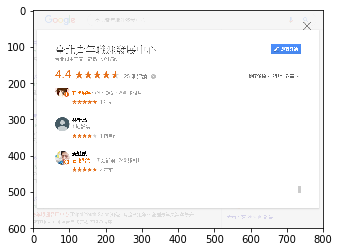

In [20]:
a = plt.imread('current.png')
plt.imshow(a)
#可見頁面已載入到最底，表示所有評論都載入了。
'''最後的作法是，先把所有的評論都載入，再一次打印所有html'''